<h1>Analyzing Referee Decisions in the Premier League (2017-2022)</h1>

Football, often referred to as the "beautiful game", is not just about the players on the pitch. The man in the middle, the referee, plays an instrumental role in dictating the flow and outcome of the game. One of the primary tools at a referee's disposal is the yellow card, a warning for players who commit fouls that aren't severe enough for a direct sending off but require some form of official caution.

The English Premier League, being one of the most watched football leagues globally, witnesses a variety of referees with distinct styles and tendencies. Over the years, debates have raged on about the consistency of refereeing standards, the influence of certain referees, and the changing dynamics of the game.

In this project, I will delve deep into a dataset spanning the Premier League seasons from 2017 to 2022. The aim is to analyze and uncover patterns related to yellow card decisions, understand the tendencies of different referees, and ultimately, to answer the intriguing questions: 

1. Has the frequency of yellow cards per game in the EPL changed over the years?
2. Which referee in the EPL was the most strict or the most lenient over the years?
3. Which team do referees in the EPL tend to favour over the years?
4. Which team in the EPL, on average, commits the most fouls per game over the years?

Let's get started!

We first need to load our dataset.  I will be using this dataset : https://www.kaggle.com/datasets/danieljrodrguez/foulsyellow-cards-premier-league-1718-2122/

In [1]:
import pandas as pd

data = pd.read_csv('all_games.csv')
data.head()

,home_team,away_team,date,referee,home_fouls,away_fouls,home_yellow,away_yellow,total_fouls,total_yellows
0,Brentford,Arsenal,"Friday August 13, 2021",Michael Oliver,15,8,0,0,23,0
1,Manchester United,Leeds United,"Saturday August 14, 2021",Paul Tierney,15,12,1,2,27,3
2,Watford,Aston Villa,"Saturday August 14, 2021",Mike Dean,21,15,3,1,36,4
3,Chelsea,Crystal Palace,"Saturday August 14, 2021",Jonathan Moss,16,17,0,0,33,0
4,Everton,Southampton,"Saturday August 14, 2021",Andy Madley,13,18,2,0,31,2


Our dataset looks pretty good.  No missing values, no extreme outliers, which look consistent with what you would expect from a football match.  However, the ```date``` column is currently an object type, which likely means it's a string. We need to convert it to a ```datetime``` format for any time series analysis.

In [2]:
data['date'] = pd.to_datetime(data['date'])
data.head()

,home_team,away_team,date,referee,home_fouls,away_fouls,home_yellow,away_yellow,total_fouls,total_yellows
0,Brentford,Arsenal,2021-08-13,Michael Oliver,15,8,0,0,23,0
1,Manchester United,Leeds United,2021-08-14,Paul Tierney,15,12,1,2,27,3
2,Watford,Aston Villa,2021-08-14,Mike Dean,21,15,3,1,36,4
3,Chelsea,Crystal Palace,2021-08-14,Jonathan Moss,16,17,0,0,33,0
4,Everton,Southampton,2021-08-14,Andy Madley,13,18,2,0,31,2


Great, now lets begin to answer our questions!

<h1>Has the frequency of yellow cards per game in the Premier League changed over the years?</h1> 

Understanding the frequency of yellow cards per game over the years is crucial as it can reflect changes in the officiating standards, the evolution of playing styles, or shifts in the game's aggressiveness. A significant change in this frequency could influence team strategies, player behavior, and even the overall fan experience during matches.  Ultimately, we could determine if referees have gotten more strict!


We can answer this question through the following steps : 
1. Extract Year from the Date Column: We've already converted the date into the datetime format. Now, we'll extract the year from it.
2. Group by Year: We'll then group the data by the extracted year and compute the average number of yellow cards for each year.
3. Plot the Results: Finally, we'll visualize our results to see if there's a noticeable trend.

In [3]:
# 1. Extract Year from the Date Column
data['year'] = data['date'].dt.year

# 2. Group by Year and compute the mean for total yellow cards
yellow_cards_per_year = data.groupby('year')['total_yellows'].mean()

# 3. Plot the Results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
yellow_cards_per_year.plot(kind='line', marker='o')
plt.title('Average Yellow Cards per Game Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Yellow Cards per Game')
plt.grid(True)
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

Wow.  The average yellow cards handed out per game over 2017 to 2022 has remained around 3 yellow cards per game.  Referees have not become more strict or more lenient over the years.  However, we can see certain small fluctuations in the average yellow cards handed out per game over 2017 to 2022.  Especially from 2018-2022, where the average yellow cards handed out per game increase a lot from 2018 to 2019, and decreased by the same amount from 2019 to 2020.

Multiple factors could have influenced these minor fluctuations. The introduction of VAR in the 2019-2020 Premier League season potentially provided more accurate decision-making, ensuring deserving incidents received yellow cards. The COVID-19 pandemic, with its unique set of challenges, including games played behind closed doors, may have led to less aggressive gameplay or changes in player behavior, with the lack to fans.

Ultimately, referees have kept their standards constant, since the average yellow cards handed out per game over 2017 to 2022 has remained around 3 yellow cards per game

<h1>Which premier league referee was the most strict or the most lenient over the years?</h1>

This one is interesting.  Knowing which referee is the strictest or most lenient can be crucial for teams and managers, as it might influence their game strategy 

We need to calculate the average number of yellow cards handed out per game by each referee.

In [ ]:
from tabulate import tabulate

# Group the data by referee and then find the average number of total yellow cards handed out by each referee per game
referee_avg_yellows = data.groupby('referee')['total_yellows'].mean().sort_values(ascending=False)

# Convert the Series to DataFrame for better visualization and round to 3 significant figures
referee_table = referee_avg_yellows.reset_index()
referee_table.columns = ['Referee Name', 'Average Yellow Cards per Game']
referee_table['Average Yellow Cards per Game'] = referee_table['Average Yellow Cards per Game'].round(3)

print(tabulate(referee_table, headers='keys', tablefmt='grid', showindex=False))


+-------------------+---------------------------------+
| Referee Name      |   Average Yellow Cards per Game |
+===================+=================================+
| John Brooks       |                           5.25  |
+-------------------+---------------------------------+
| Mike Dean         |                           4.159 |
+-------------------+---------------------------------+
| Michael Salisbury |                           4     |
+-------------------+---------------------------------+
| Mike Jones        |                           3.833 |
+-------------------+---------------------------------+
| David Coote       |                           3.812 |
+-------------------+---------------------------------+
| Stuart Attwell    |                           3.798 |
+-------------------+---------------------------------+
| Jarred Gillett    |                           3.778 |
+-------------------+---------------------------------+
| Craig Pawson      |                           

From the data analyzed over the Premier League seasons from 2017 to 2022, John Brooks stands out as the strictest referee, handing out an average of 5.25 yellow cards per game. On the other end of the spectrum, Oliver Langford appears to be the most lenient, with an average of just 1 yellow card per game. This information provides valuable insights into the tendencies of different referees and could potentially influence game strategies for teams and managers.

<h1>Which team do referees in the EPL tend to favour over the years?</h1>

This one is the most interesting to me.  Understanding how often teams are shown yellow cards, in relation to the fouls they commit, is crucial. Teams with a lower average of yellow cards might be seen as being favored by referees, especially if they commit a comparable number of fouls as other teams.

We will calculate:

1. The average number of fouls committed by each team (both home and away).
2. The average number of yellow cards received by each team (both home and away).
3. The ratio of average fouls to average yellow cards.

In [ ]:
# Calculate the average fouls and average yellow cards for home teams
avg_home_fouls = data.groupby('home_team')['home_fouls'].mean()
avg_home_yellows = data.groupby('home_team')['home_yellow'].mean()

# Calculate the average fouls and average yellow cards for away teams
avg_away_fouls = data.groupby('away_team')['away_fouls'].mean()
avg_away_yellows = data.groupby('away_team')['away_yellow'].mean()

# Combine home and away averages
avg_fouls = (avg_home_fouls + avg_away_fouls) / 2
avg_yellows = (avg_home_yellows + avg_away_yellows) / 2
foul_yellow_ratio = avg_fouls / avg_yellows

# Convert to DataFrame for tabulation
team_table = pd.DataFrame({
    'Team Name': avg_fouls.index,
    'Average Fouls': avg_fouls.values,
    'Average Yellow Cards': avg_yellows.values,
    'Fouls per Yellow Card': foul_yellow_ratio.values
})

team_table = team_table.sort_values(by='Fouls per Yellow Card', ascending=True)

# Tabulate
from tabulate import tabulate
print(tabulate(team_table, headers='keys', tablefmt='grid', showindex=False))


+-------------------------+-----------------+------------------------+-------------------------+
| Team Name               |   Average Fouls |   Average Yellow Cards |   Fouls per Yellow Card |
+=========================+=================+========================+=========================+
| Bournemouth             |         10.7105 |                1.73684 |                 6.16667 |
+-------------------------+-----------------+------------------------+-------------------------+
| Arsenal                 |         11.9263 |                1.79474 |                 6.64516 |
+-------------------------+-----------------+------------------------+-------------------------+
| Brentford               |         11.7632 |                1.76316 |                 6.67164 |
+-------------------------+-----------------+------------------------+-------------------------+
| Aston Villa             |         13.4825 |                2       |                 6.74123 |
+-------------------------+---

That is very useful data.  We could do a lot of analysis from there.  However, for this project, to visualize the data in a more readable form, I will use a bar graph to represent the "Fouls per Yellow Card" metric for each team. This will provide a visual representation of which teams get more fouls per yellow card they receive, possibly indicating which teams referees might be favoring, displaying each Premier League team on the Y-axis and the average number of fouls they commit per yellow card they receive on the X-axis. 

**A team with a higher value on this scale may indicate they are being favored by referees as they commit more fouls per yellow card they receive compared to other teams.**



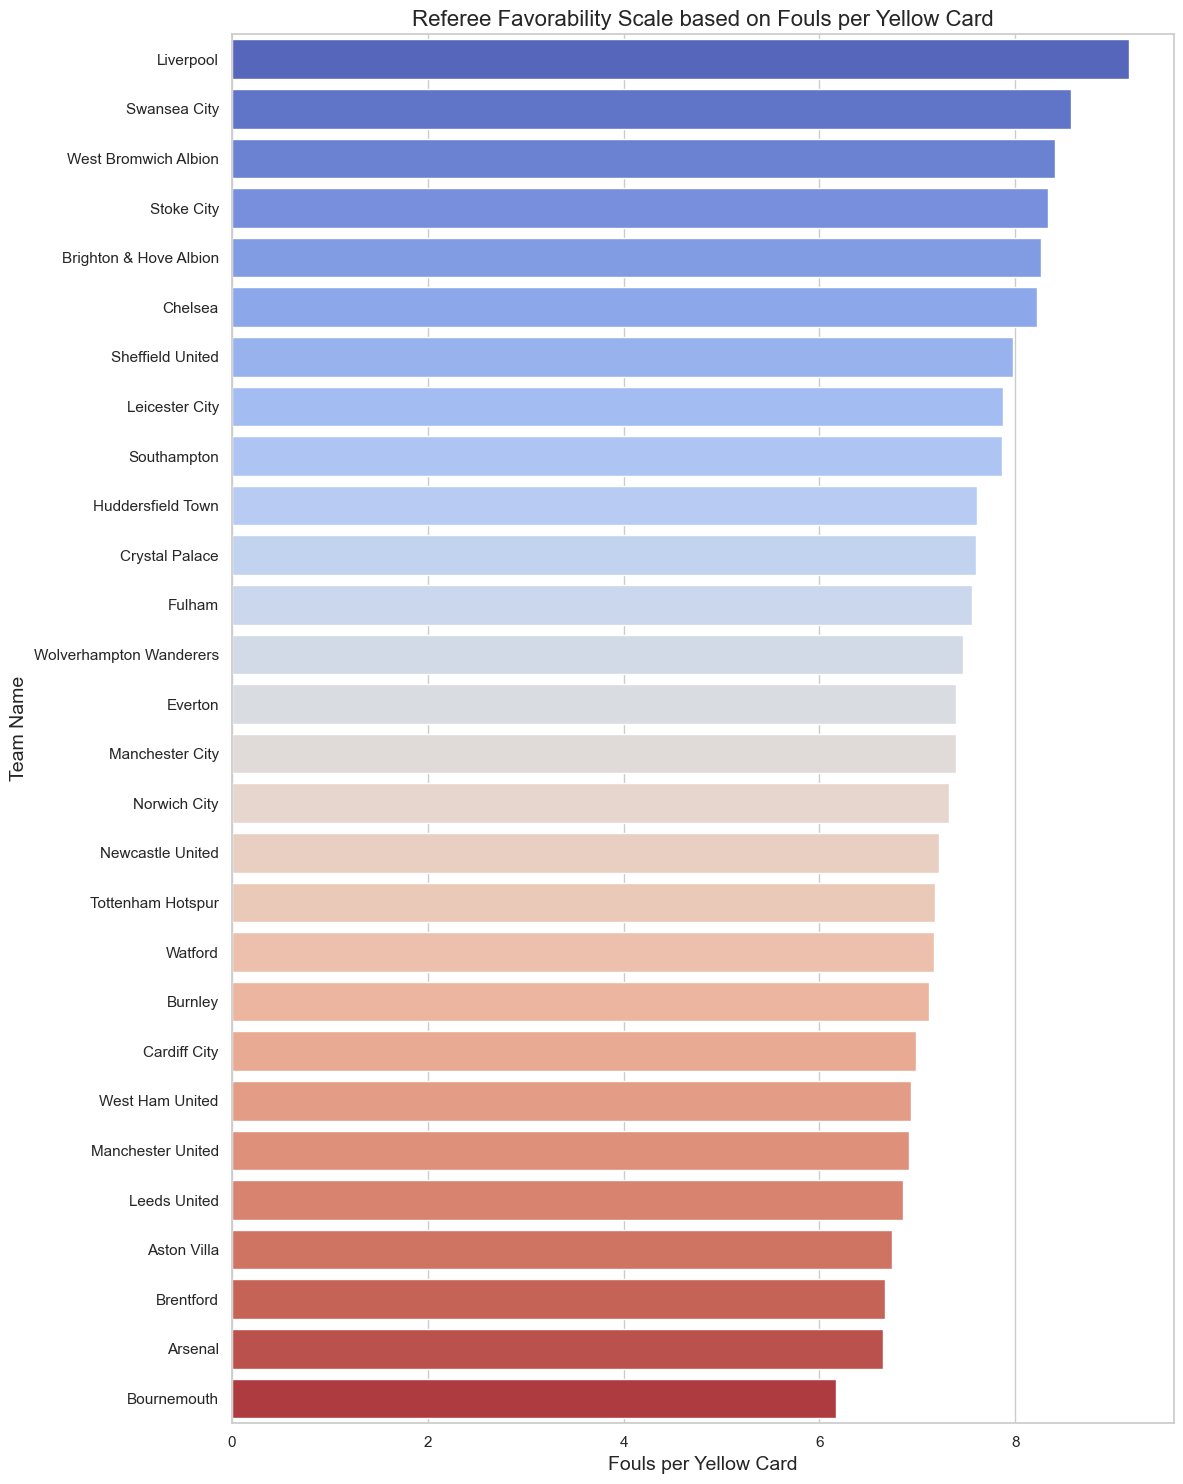

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a color palette
palette = sns.color_palette("coolwarm", len(team_table))

# Sort values for better visualization
team_table_sorted = team_table.sort_values('Fouls per Yellow Card', ascending=False)

# Create a figure and a set of subplots
plt.figure(figsize=(12, 15))

# Plot data
bar_plot = sns.barplot(y=team_table_sorted['Team Name'], x=team_table_sorted['Fouls per Yellow Card'], palette=palette)

# Set labels and title
plt.xlabel('Fouls per Yellow Card', fontsize=14)
plt.ylabel('Team Name', fontsize=14)
plt.title('Referee Favorability Scale based on Fouls per Yellow Card', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


Very interesting.  Liverpool seems to be the most favoured by refs whereas Bournemouth seems to be the least favoured by refs (no wonder they are always relagated).  Interestingly, four teams in the 'Big 6' (6 of the biggest clubs in EPL - United, City, Arsenal, Liverpool, Chelsea, and Spurs) are in the bottom half of the chart, which means they are less favoured, whereas only two teams in the 'Big 6' (Liverpool and Chelsea) are in the top half.  With the exeception of Bournemounth and Leeds, referees tend to favour relagation zone hovering clubs.  This chart will spark debate among football fans.  Seems like refs like Liverpool a lot